# PandasAI

# 1.환경준비

## (1) 라이브러리 설치

In [ ]:
!pip install pandasai

* 설치 후 런타임 재시작

## (2) 라이브러리 Import

In [ ]:
import pandas as pd
import numpy as np
from pandasai import SmartDataframe
from pandasai.llm import OpenAI

In [ ]:
# openai key
api_key = 'my key' # 비공유를 위해 삭제

# 2.무작정 사용해보기

## (1) 데이터 준비

In [ ]:
# Sample DataFrame
sales_by_country = pd.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "sales": [5000, 3200, 2900, 4100, 2300, 2100, 2500, 2600, 4500, 7000]
})
sales_by_country

,country,sales
0,United States,5000
1,United Kingdom,3200
2,France,2900
3,Germany,4100
4,Italy,2300
5,Spain,2100
6,Canada,2500
7,Australia,2600
8,Japan,4500
9,China,7000


In [ ]:
# Instantiate a LLM
llm = OpenAI(api_token=api_key)

## (2) 사용하기

In [ ]:
# 스마트 데이터프레임으로 변환
df = SmartDataframe(sales_by_country, config={"llm": llm})

# 질의
query = '매출이 가장 높은 국가는?'
df.chat(query)

'The country with the highest sales is China.'

## (3) 실습
* 몇가지 질문을 던지고 답변을 받아 봅시다.
* 아직 PandasAI 라이브러리가 안정적이지 않아, 오류가 발생될수 있습니다.

In [ ]:
query = '독일의 매출은?'
df.chat(query)

4100

In [ ]:
query = '매출 순서대로 내림차순해서 나라, 매출 출력해줘'
df.chat(query)

,country,sales
9,China,7000
0,United States,5000
8,Japan,4500
3,Germany,4100
1,United Kingdom,3200
2,France,2900
7,Australia,2600
6,Canada,2500
4,Italy,2300
5,Spain,2100


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sales'].plot(kind='hist', bins=20, title='sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['sales'].plot(kind='line', figsize=(8, 4), title='sales')
plt.gca().spines[['top', 'right']].set_visible(False)

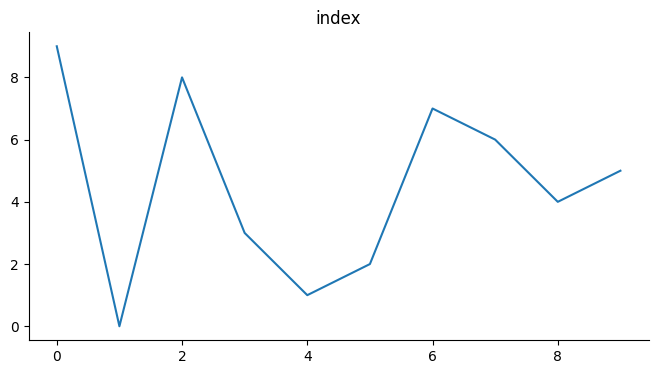

In [ ]:
from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

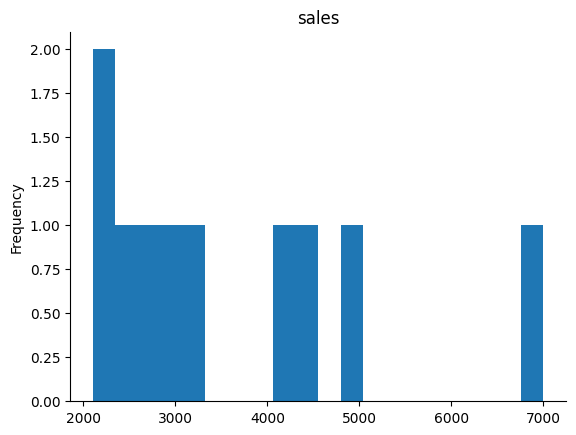

In [ ]:
from matplotlib import pyplot as plt
_df_1['sales'].plot(kind='hist', bins=20, title='sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

# 3.데이터 조회 및 분석

## (1) 데이터 준비

* 데이터프레임으로 저장하기

In [ ]:
titanic = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


In [ ]:
air = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/airquality_simple.csv")
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


* Smart DataFrame 으로 저장

In [ ]:
titanic_sdf = SmartDataframe(titanic, config={"llm": llm})
air_sdf = SmartDataframe(air, config={"llm": llm})

## (2) 데이터 조회하기

* 다양한 질문으로 데이터를 조회해 봅시다.

### 1) titanic

In [ ]:
query = "타이타닉 탑승객 데이터야. 여자 승객은 총 몇명이야?"
titanic_sdf.chat(query)

314

In [ ]:
query = "타이타닉 탑승객 데이터야. 여자 승객 중 이름에 Mrs 호칭이 붙은 승객 명단을 조회해줘"
titanic_sdf.chat(query)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg,Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,Southampton,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,Cherbourg,Mrs
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,16.0000,Southampton,Mrs
...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,52.5542,Southampton,Mrs
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,24.0000,Cherbourg,Mrs
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,83.1583,Cherbourg,Mrs
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,26.0000,Southampton,Mrs


In [ ]:
query = "타이타닉 탑승객 데이터야. 칼럼 이름 조회"
titanic_sdf.chat(query)

'PassengerId, Survived, Pclass, Name, Sex, Age, Fare, Embarked'

In [ ]:
query = "Age 칼럼의 기초통계량을 조회해줘. 결과는 데이터프레임 형태로 보여줘."
titanic_sdf.chat(query)

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


* 실습
    * 위 질문을 변형해서 탐색해 봅시다.

In [ ]:
query = "Sex가 남자이고, Fare가 평균이상인 승객 중에서 Survived가 1인 결과. 결과는 데이터프레임 형태로 보여줘."
titanic_sdf.chat(query)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,35.5000,Southampton,Mr
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,35.5000,Southampton,Mr
74,75,1,3,"Bing, Mr. Lee",male,32.00,56.4958,Southampton,Mr
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.00,63.3583,Cherbourg,Mr
183,184,1,2,"Becker, Master. Richard F",male,1.00,39.0000,Southampton,Master
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.00,90.0000,Southampton,Mr
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.00,52.5542,Southampton,Mr
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,151.5500,Southampton,Master
370,371,1,1,"Harder, Mr. George Achilles",male,25.00,55.4417,Cherbourg,Mr
390,391,1,1,"Carter, Mr. William Ernest",male,36.00,120.0000,Southampton,Mr


In [ ]:
# 요일조회, ffill로 채워줘

### 2) air

* air quality 데이터에 대해서 다양한 조회를 시도해 보세요.
    * 예
        * 가장 오존농도가 높은 날은?
        * 요일별 평균 오존농도 조회해줘.
        * 각 변수 상호간의 상관계수 조회


In [ ]:
query = "오존 농도가 가장 높은 날은?"
air_sdf.chat(query)

In [ ]:
query = "각 변수 상호간의 상관계수 조회"
air_sdf.chat(query)

In [ ]:
query = "요일별 평균 오존농도 조회."
air_sdf.chat(query)

In [ ]:
query = "데이터에 NaN이 있어. ffill로 채워서 조회해"
air_sdf.chat(query)

## (3) 데이터 분석하기

* 단변량, 이변량 분석을 위한 질문을 통해 그래프와 기초 통계량을 구해 봅시다.

### 1) titanic

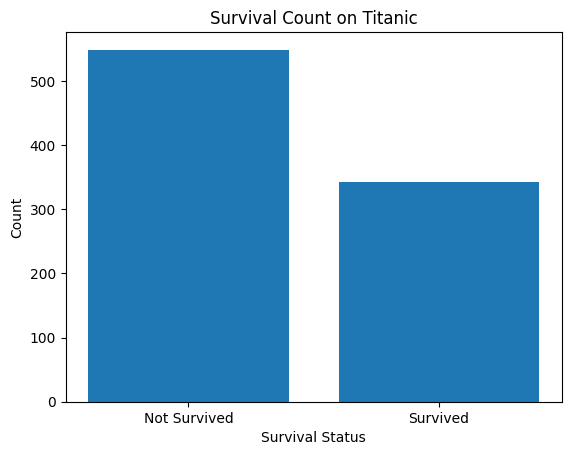

ERROR:pandasai.helpers.logger:Pipeline failed on step 6: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 35, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
query = "생존여부에 대해 막대그래프 그려줘"
titanic_sdf.chat(query)

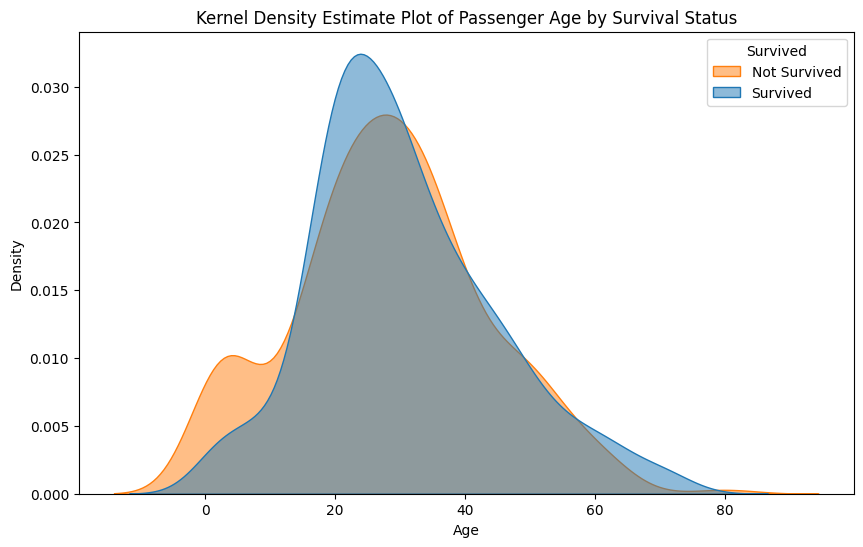

ERROR:pandasai.helpers.logger:Pipeline failed on step 6: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 35, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
query = "생존여부 별로 탑승객 나이에 대해 kdeplot 그려줘"
titanic_sdf.chat(query)

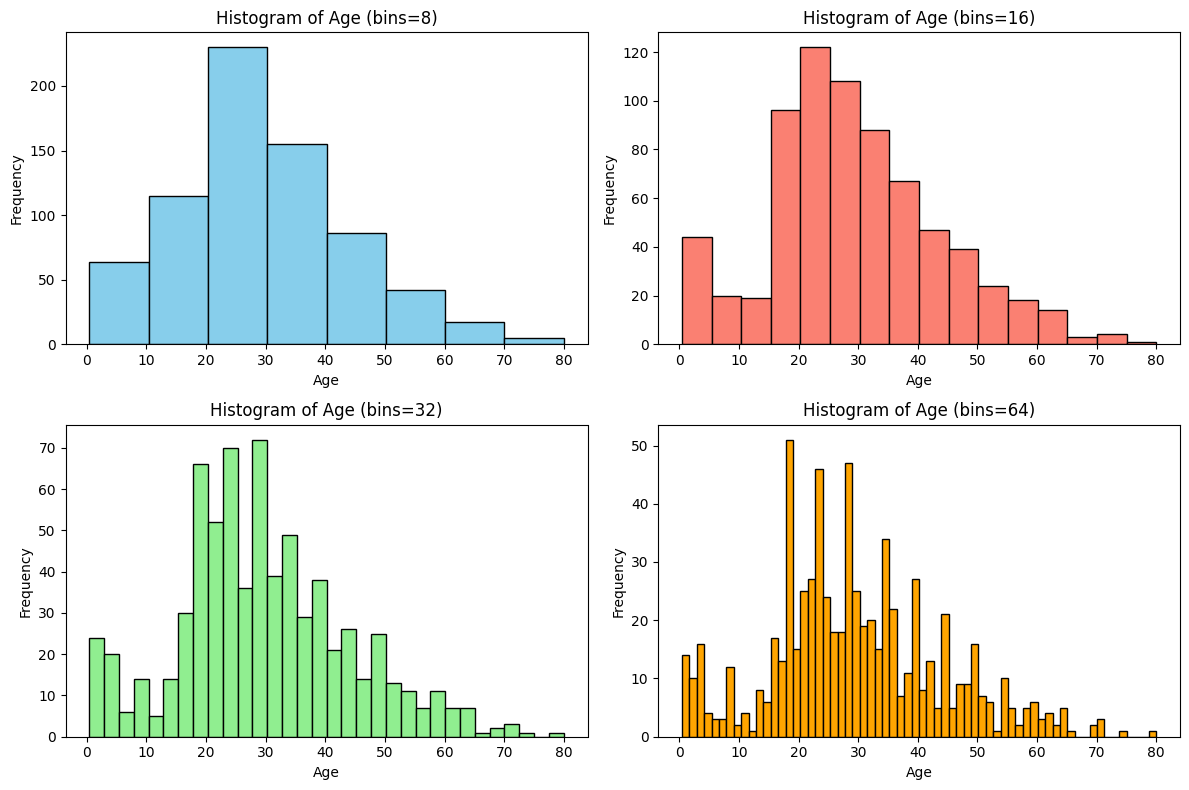

ERROR:pandasai.helpers.logger:Pipeline failed on step 6: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 35, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
query = "Age에 대한 히스토그램을 그려줘. 그릴 때, bin의 수를 8, 16, 32, 64로 지정해"
titanic_sdf.chat(query)

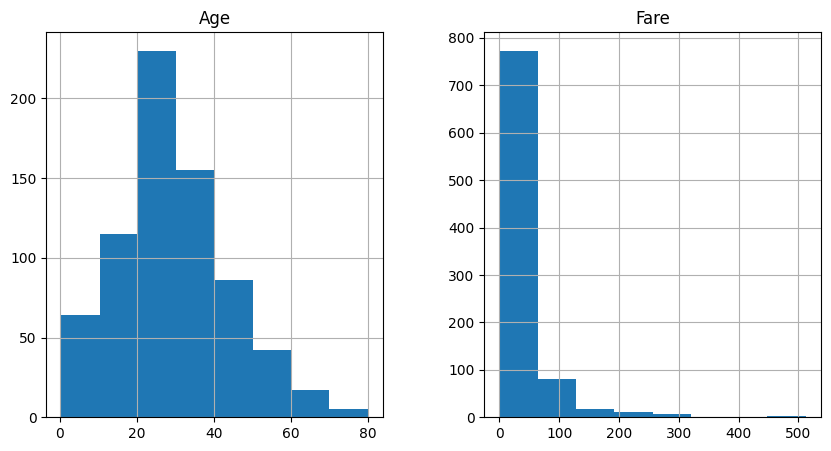

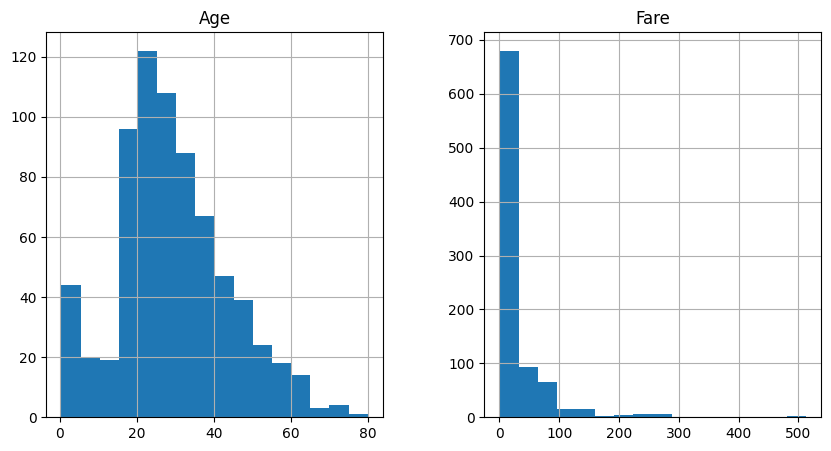

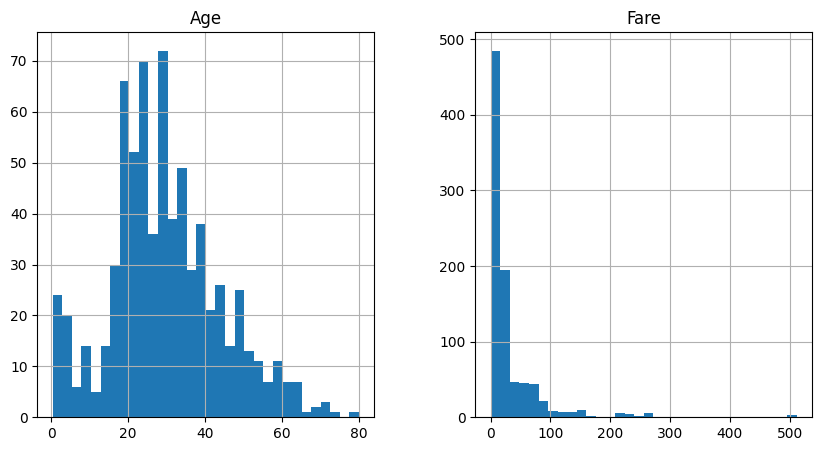

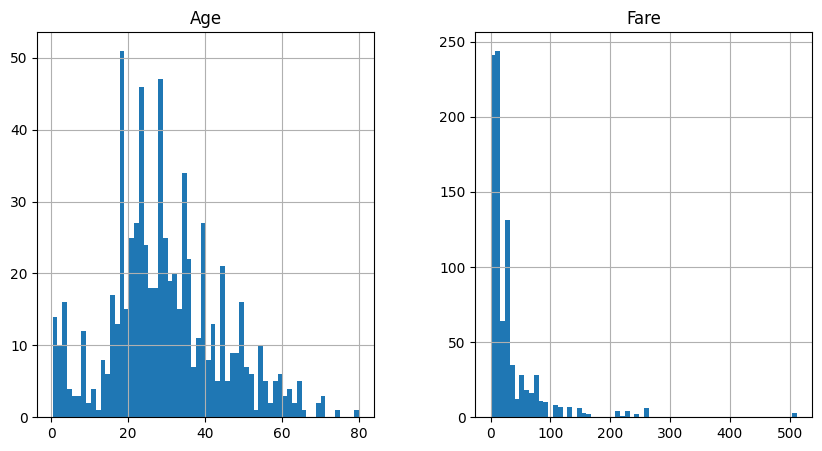

ERROR:pandasai.helpers.logger:Pipeline failed on step 6: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 35, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
titanic_sdf.chat("수치형 변수가, Age, Fare야. 이 둘에 대해서 히스토그램 그려줘")


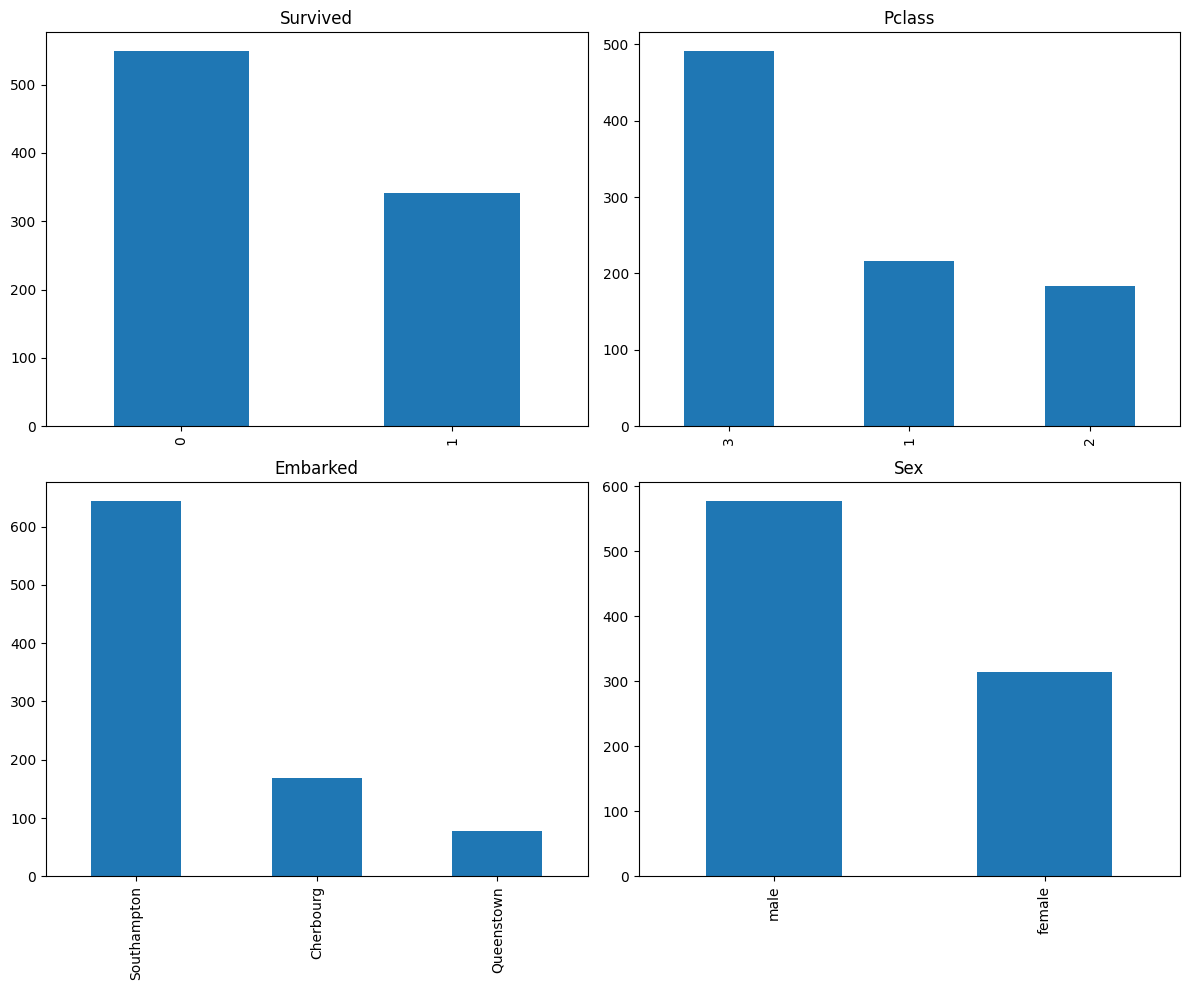

ERROR:pandasai.helpers.logger:Pipeline failed on step 6: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 35, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
titanic_sdf.chat("범주형 변수가 Survived, Pclass, Embarked, Sex 야. 이 변수들에 대해서 막대 그래프 그려줘")

# 4.실습
* 카시트 데이터에 대해 단변량, 이변량 분석을 수행해 봅시다.
* 수치형, 범주형에 맞게 그래프를 그리도록 요청하고
* 해석은 우리가 합니다.

## (1) 데이터 준비

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_simple.csv")
data.head()

,Sales,CompPrice,Income,Price,ShelveLoc,Urban,US
0,9.50,138,73,120,Bad,Yes,Yes
1,11.22,111,48,83,Good,Yes,Yes
2,10.06,113,35,80,Medium,Yes,Yes
3,7.40,117,100,97,Medium,Yes,Yes
4,4.15,141,64,128,Bad,Yes,No


* SmartDataframe 생성하기

In [ ]:
data_sdf = SmartDataframe(data, config={"llm": llm})

## (2) 단변량 분석

In [ ]:
query = "기초통계량, 데이터 shape, info 정보 보여줘"
data_sdf.chat(query)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sales      400 non-null    float64
 1   CompPrice  400 non-null    int64  
 2   Income     400 non-null    int64  
 3   Price      400 non-null    int64  
 4   ShelveLoc  400 non-null    object 
 5   Urban      400 non-null    object 
 6   US         400 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 22.0+ KB


,Sales,CompPrice,Income,Price
count,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,115.795000
std,2.824115,15.334512,27.986037,23.676664
min,0.000000,77.000000,21.000000,24.000000
25%,5.390000,115.000000,42.750000,100.000000
50%,7.490000,125.000000,69.000000,117.000000
75%,9.320000,135.000000,91.000000,131.000000
max,16.270000,175.000000,120.000000,191.000000


ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 97, in execute
    raise InvalidOutputValueMismatch(
pandasai.exceptions.InvalidOutputValueMismatch: Value type <class 'module'> must match with type plot

ERROR:pandasai.helpers.logger:Pipeline failed on step 1: No code found in the response
ERROR:pandasai.helpers.logger:Pipeline failed on step 6: No code found in the response
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 97, in execute
    raise InvalidOutputValueMismatch(
pandasai.exceptions.InvalidOutputValueMismatch: Value type <class 'module'> must match with type plot

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py

'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo code found in the response\n'

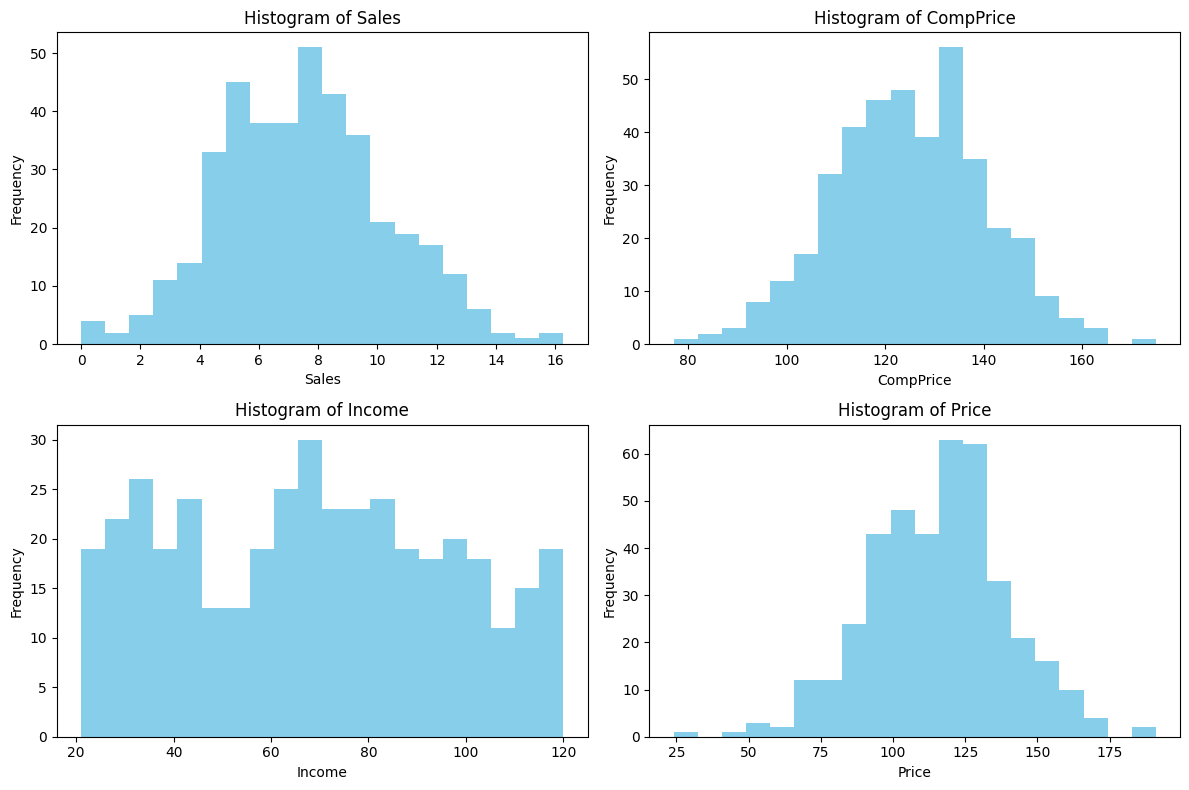

In [ ]:
query = "수치형 변수에 대해 히스토그램 그려줘"
data_sdf.chat(query)

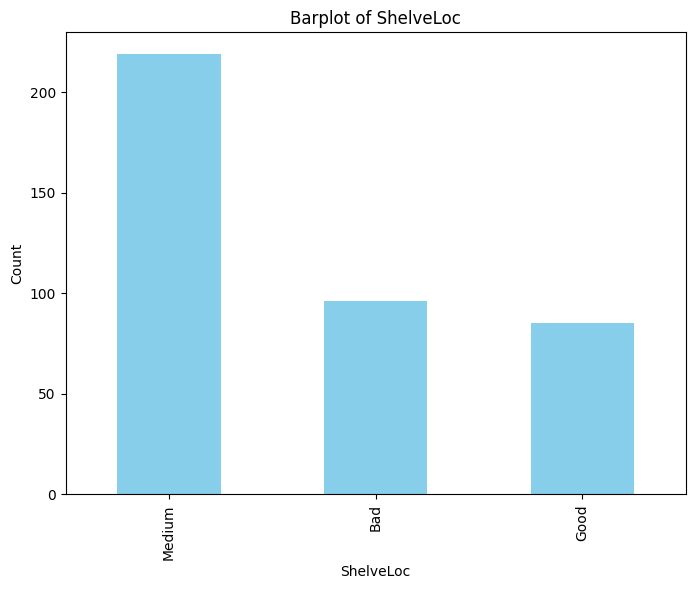

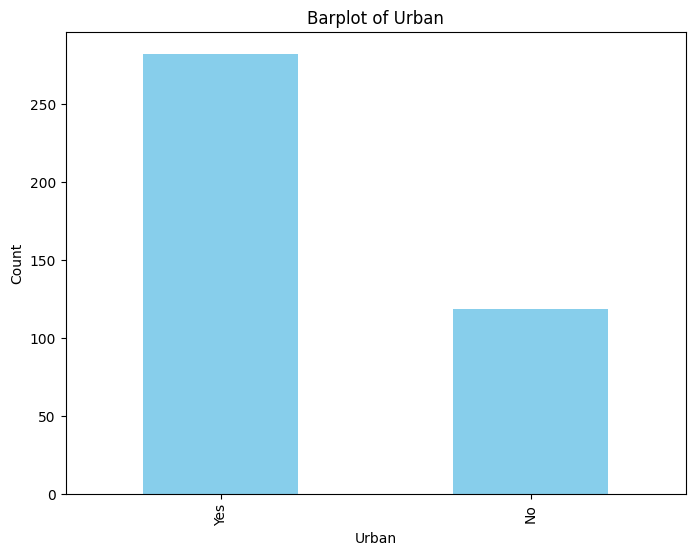

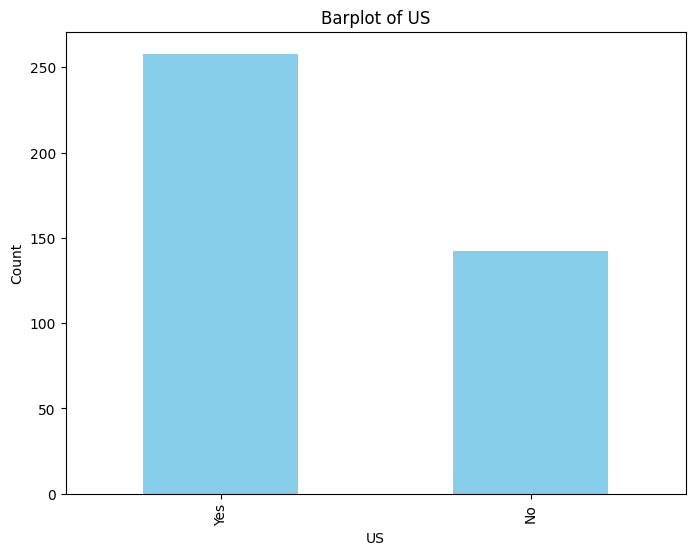

ERROR:pandasai.helpers.logger:Pipeline failed on step 6: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 35, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
query = "범주형 변수에 대해 barplot 그려줘"
data_sdf.chat(query)

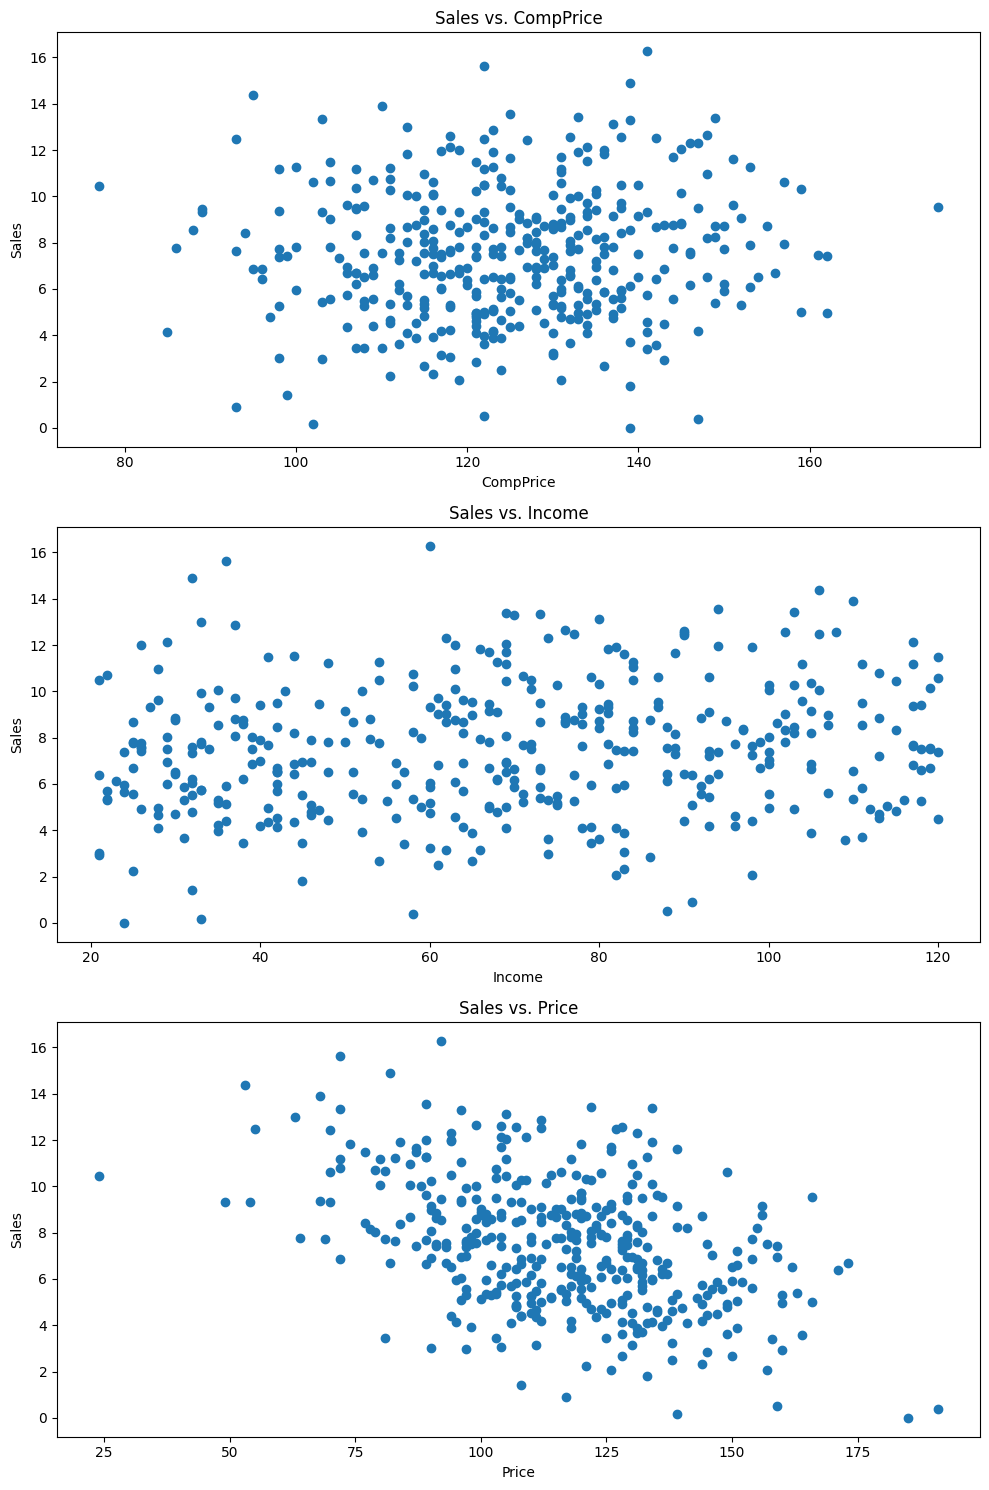

ERROR:pandasai.helpers.logger:Pipeline failed on step 6: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 35, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
query = "수입,CompPrice,Price에 따른 Salse 그래프 각각 그려줘  "
data_sdf.chat(query)

## (3) 이변량 분석

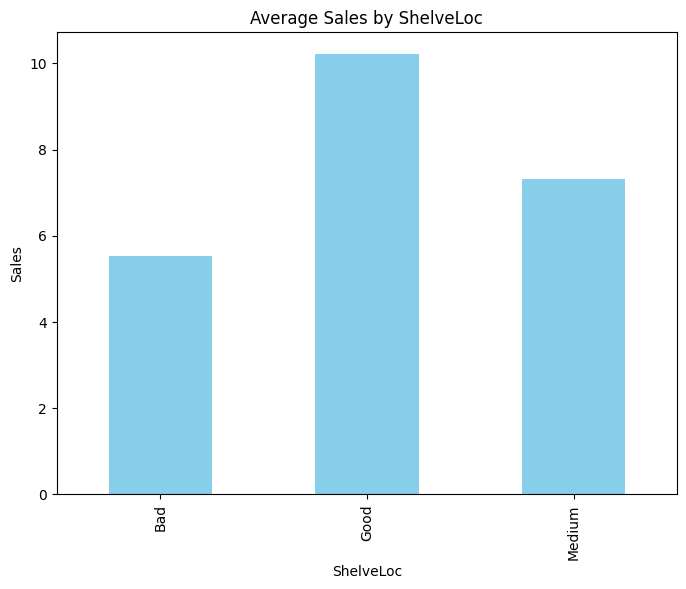

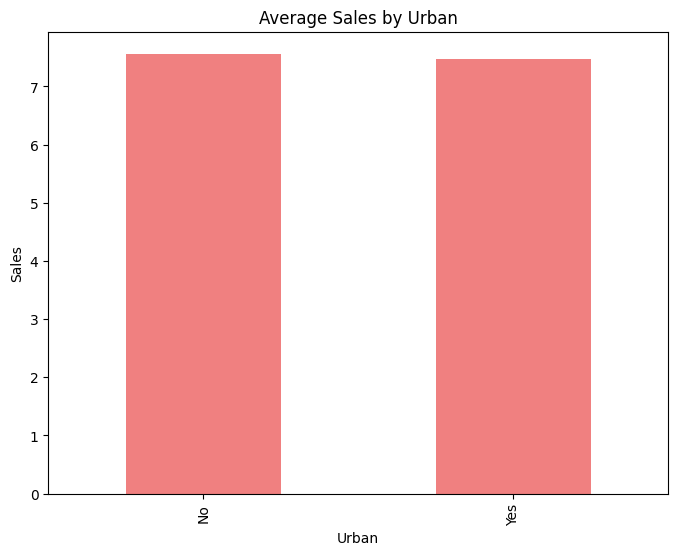

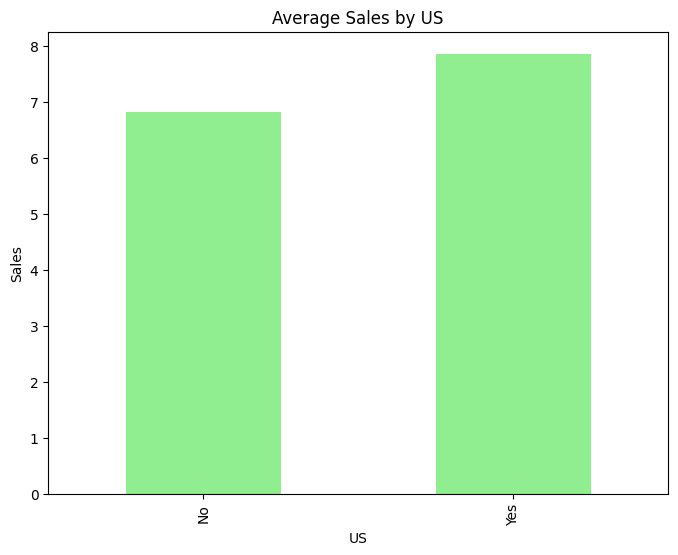

'Plots generated successfully.'

In [ ]:
query = "범주형 변수에 따른 Salse 그래프 각각 그려줘"
data_sdf.chat(query)

## (4) 추가분석

* 추가 분석할 요소를 2개 이상 뽑아서 그래프를 그려 봅시다.

<string>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


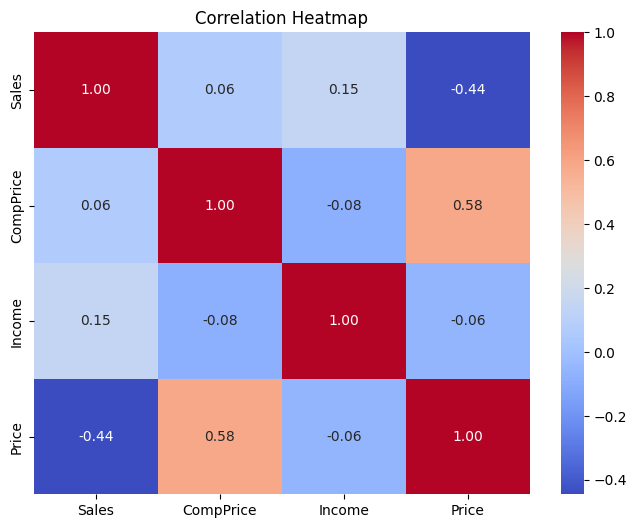

'Variables highly correlated with Sales: Income, CompPrice, Price'

In [ ]:
query = "corr, heatmap 출력하고, Sales와 상관관계가 높은 변수와 corr 결과 출력해줘"
data_sdf.chat(query)

In [ ]:
query = "Sales와 상관관계가 높은 변수 내림차순 결과를 corr 결과와 함께 차례대로 출력해줘"
data_sdf.chat(query)

<string>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 97, in execute
    raise InvalidOutputValueMismatch(
pandasai.exceptions.InvalidOutputValueMismatch: Value type <class 'pandas.core.series.Series'> must match with type string

<string>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,Variable,Correlation with Sales
0,Income,0.151951
1,CompPrice,0.064079
2,Price,-0.444951


In [ ]:
query = "Sales를 종속변수로 하고, random forest의 feature importance를 구해서 변수의 중요도가 높은 순서대로 출력해줘"
data_sdf.chat(query)

,0
Price,0.345383
ShelveLoc_Good,0.251282
CompPrice,0.167723
Income,0.124975
ShelveLoc_Medium,0.040196
ShelveLoc_Bad,0.029509
US_No,0.012964
US_Yes,0.012187
Urban_Yes,0.008478
Urban_No,0.007304


from matplotlib import pyplot as plt
_df_5[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
query = "random forest의 feature importance 중요도가 높은 순서 5개 변수로 예측 모델링 하고 모델명, 평가점수 출력해줘"
data_sdf.chat(query)

'Model: Random Forest Regressor with top 5 features\nR2 Score: 0.6506437618411012'

In [ ]:
query = "random forest의 feature importance 중요도가 높은 순서 5개 변수로 예측 모델링 하고 모델명, 평가점수 출력해줘, 모델 5개 사용, 코드도 알려줘"
data_sdf.chat(query)

'Model 1: RandomForestRegressor()\nR2 Score 1: -0.540148766858493\n\nModel 2: RandomForestRegressor()\nR2 Score 2: -0.1706711138787944\n\nModel 3: RandomForestRegressor()\nR2 Score 3: 0.3088334040330645\n\nModel 4: RandomForestRegressor()\nR2 Score 4: 0.273247139005542\n\nModel 5: RandomForestRegressor()\nR2 Score 5: 0.6363729035777438'

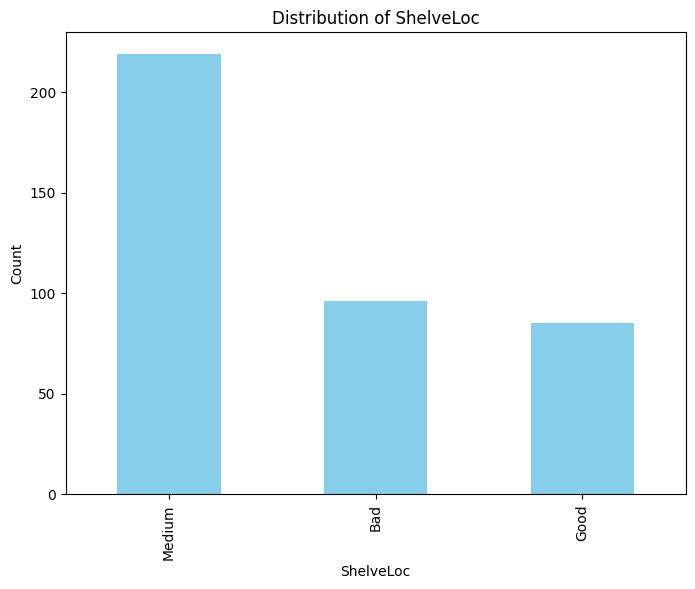

ERROR:pandasai.helpers.logger:Pipeline failed on step 6: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
  File "/usr/local/lib/python3.10/dist-packages/pandasai/responses/response_serializer.py", line 35, in serialize
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'\n"

In [ ]:
query = "데이터 분석 결과를 토대로 Sales 증가 전략 알려줘"
data_sdf.chat(query)